In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant < 5].reset_index(drop=True)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1,1,43,39,2,1,1,1.244082,0
1,1,1,2,60,50,4,3,1,1.101821,1
2,1,1,3,44,36,4,2,2,1.029923,0
3,1,1,4,55,55,4,3,2,1.368007,0
4,1,1,5,52,49,4,3,3,1.039329,1


## Initialize the model

In [3]:
model = rlssm.LBAModel_2A(2)

INFO:cmdstanpy:compiling stan file /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/LBA_2A/hierLBA_2A.stan to exe file /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/LBA_2A/hierLBA_2A
INFO:cmdstanpy:compiled model executable: /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/LBA_2A/hierLBA_2A
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/LBA_2A/hierLBA_2A.hpp /Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/LBA_2A/hierLBA_2A.stan
Warning in '/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/LBA_2A/hierLBA_2A.stan', line 95, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/khamir/_DecisionMaking/_rlssm/rlssm/rlssm/stan_models/LBA_2A/

## Fit

In [4]:
# sampling parameters
n_iter = 500
n_chains = 2
n_thin = 5

In [5]:
model_fit = model.fit(data,
                      print_diagnostics=False,
                      thin = n_thin,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains)

INFO:cmdstanpy:CmdStan start processing


Fitting the model using the priors:
drift_priors {'mu_mu': 2, 'sd_mu': 3, 'mu_sd': 1, 'sd_sd': 1}
k_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
sp_trial_var_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
ndt_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 0, 'sd_sd': 1}
drift_variability_priors {'mu_mu': 1, 'sd_mu': 1, 'mu_sd': 1, 'sd_sd': 1}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### Get Rhat

In [6]:
model_fit.rhat.describe()

,rhat
count,1693.000000
mean,0.999634
std,0.001879
min,0.990000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,0.99,lp__
k,1.00,k
sp_trial_var,1.00,sp_trial_var
ndt,1.00,ndt
drift_cor,1.00,drift_cor


#### Calculate wAIC

In [8]:
model_fit.waic

{'lppd': -179.4547407034895,
 'p_waic': 3.6847536096391673,
 'waic': 366.27898862625733,
 'waic_se': 29.49350688229591}

### Posteriors

In [9]:
model_fit.samples

,transf_k,transf_sp_trial_var,transf_ndt,transf_drift_cor,transf_drift_inc,transf_drift_variability
0,1.327740,2.039190,0.469720,2.57142,1.502690,0.873968
1,2.176300,1.997960,0.412261,3.52625,2.119080,1.134530
2,0.675487,1.020150,0.404200,1.28243,0.786292,0.360149
3,1.442480,1.501960,0.271174,2.07382,1.307180,0.491277
4,2.214710,0.638742,0.098842,1.98209,1.454040,0.569998
...,...,...,...,...,...,...
195,0.901877,2.001900,0.469556,2.04926,1.303540,0.448283
196,2.620670,1.334180,0.151096,2.89157,1.903890,0.779778
197,2.286870,2.132560,0.335135,3.33912,2.055570,0.949434
198,1.680140,1.718160,0.367627,2.54535,1.669160,0.815239


In [10]:
model_fit.trial_samples

{'k_t': array([[1.32774 , 1.32774 , 1.32774 , ..., 1.32774 , 1.32774 , 1.32774 ],
        [2.1763  , 2.1763  , 2.1763  , ..., 2.1763  , 2.1763  , 2.1763  ],
        [0.675487, 0.675487, 0.675487, ..., 0.675487, 0.675487, 0.675487],
        ...,
        [2.28687 , 2.28687 , 2.28687 , ..., 2.28687 , 2.28687 , 2.28687 ],
        [1.68014 , 1.68014 , 1.68014 , ..., 1.68014 , 1.68014 , 1.68014 ],
        [1.66317 , 1.66317 , 1.66317 , ..., 1.66317 , 1.66317 , 1.66317 ]]),
 'sp_trial_var_t': array([[2.03919, 2.03919, 2.03919, ..., 2.03919, 2.03919, 2.03919],
        [1.99796, 1.99796, 1.99796, ..., 1.99796, 1.99796, 1.99796],
        [1.02015, 1.02015, 1.02015, ..., 1.02015, 1.02015, 1.02015],
        ...,
        [2.13256, 2.13256, 2.13256, ..., 2.13256, 2.13256, 2.13256],
        [1.71816, 1.71816, 1.71816, ..., 1.71816, 1.71816, 1.71816],
        [0.61181, 0.61181, 0.61181, ..., 0.61181, 0.61181, 0.61181]]),
 'ndt_t': array([[0.46972 , 0.46972 , 0.46972 , ..., 0.46972 , 0.46972 , 0.46972 

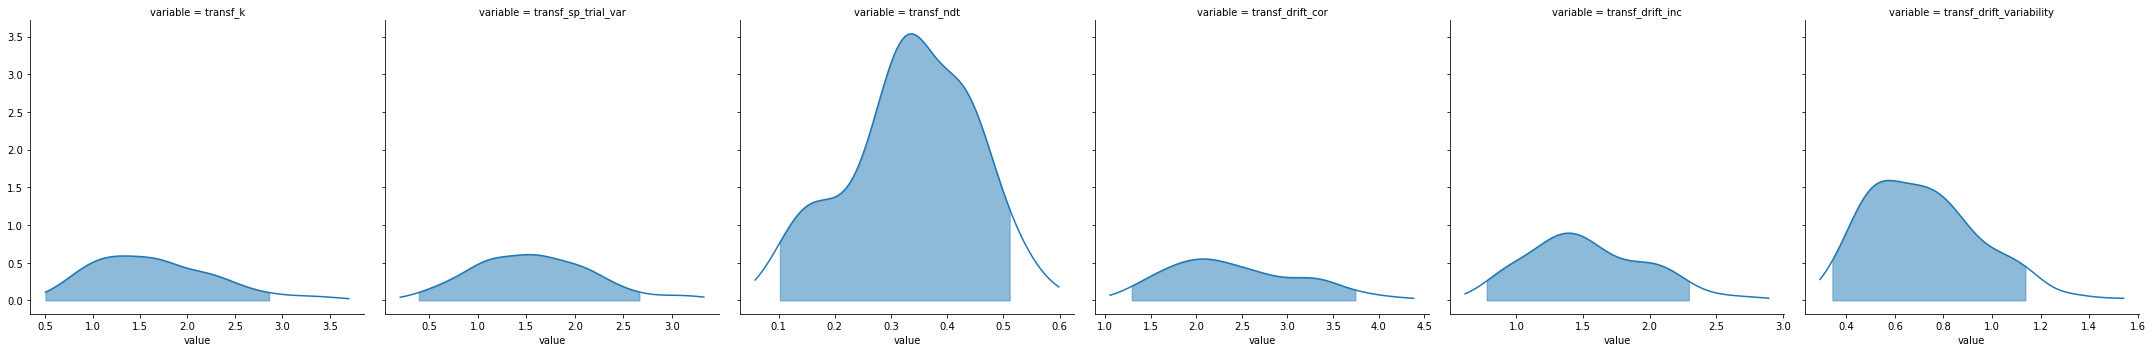

In [11]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

In [12]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [13]:
pp_rt

array([[1.27871563, 1.24773377, 1.49940964, ..., 1.54227023, 1.44308704,
        1.36662551],
       [1.13292617, 1.06354241, 1.33054061, ..., 1.41379496, 1.05217684,
        1.56004244],
       [1.62460452, 1.32324412, 1.30848539, ..., 1.70197253, 1.51349457,
        1.07318972],
       ...,
       [1.38412629, 1.1847749 , 1.41446227, ..., 1.34100166, 1.08972758,
        1.35630893],
       [1.39544203, 0.92112543, 1.2115566 , ..., 1.45921421, 1.1884954 ,
        1.09202342],
       [1.54418363, 1.20312955, 1.14579629, ..., 1.48243413, 1.03089907,
        1.60103518]])

In [14]:
pp_acc

array([[1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.916667,1.375638,-0.033156,1.404772,1.431360,1.504142,1.560281,1.636645,1.058402,1.201130,1.361701,1.516361,1.677781
2,0.983333,1.298984,0.022496,1.476423,1.480128,1.508452,1.536493,1.538505,1.084870,1.165726,1.315369,1.397548,1.512099
3,0.879167,1.311648,0.089421,1.303032,1.338911,1.378283,1.432589,1.519087,1.004095,1.144447,1.276923,1.429653,1.638211
4,0.958333,1.332154,-0.037702,1.416321,1.438470,1.453877,1.500573,1.604429,1.060245,1.178064,1.323725,1.461441,1.603176
5,1.000000,1.383956,-0.069103,NaN,NaN,NaN,NaN,NaN,1.244349,1.321363,1.382579,1.456389,1.511538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.895833,1.367526,-0.037212,1.392439,1.414417,1.456805,1.503795,1.594664,1.120323,1.239748,1.342961,1.471811,1.599984
97,0.987500,1.298115,0.208532,1.507483,1.510298,1.513113,1.539762,1.566412,1.079965,1.176599,1.272974,1.408404,1.534946
98,0.937500,1.338239,-0.061658,1.366154,1.393173,1.407175,1.545841,1.622674,1.016103,1.188849,1.336361,1.477864,1.638783


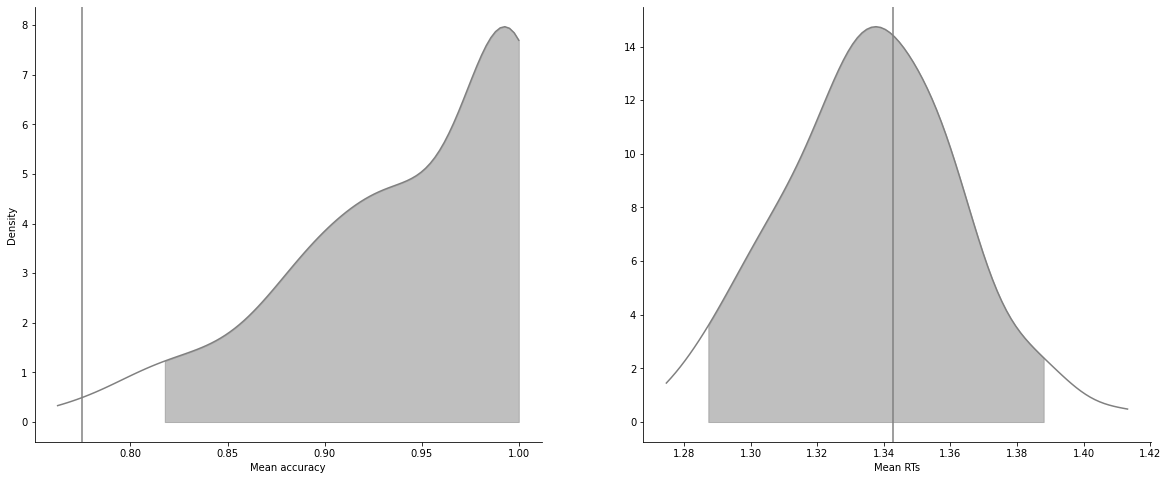

In [16]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

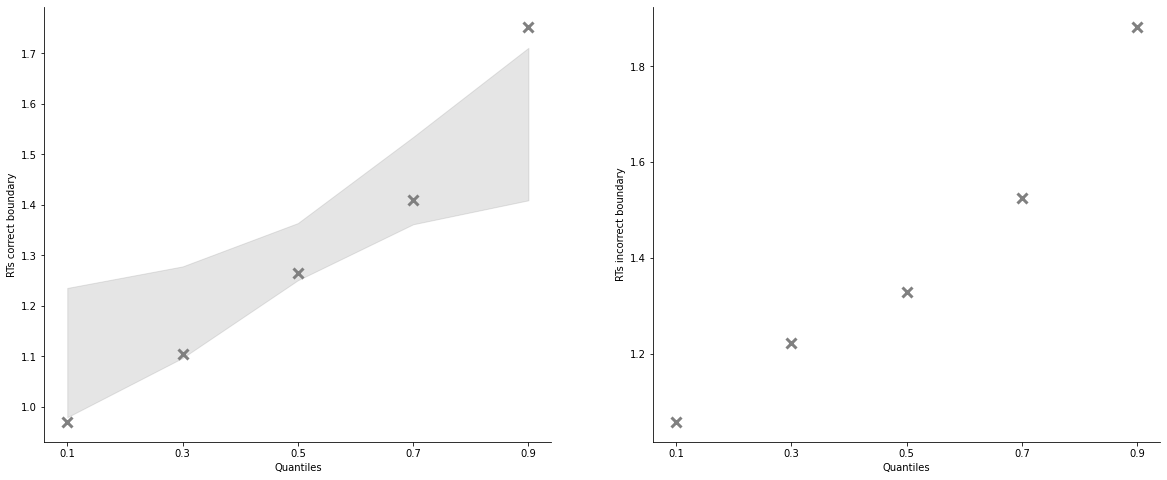

In [17]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [18]:
import numpy as np

In [19]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [20]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,5,1,1,55,51,4,3,1,1.114574,1,1,CD,1
1,1,5,1,2,54,37,4,2,1,1.050116,1,1,BD,1
2,2,5,1,3,54,50,4,2,2,0.812983,1,1,BD,1
3,3,5,1,4,64,32,4,2,3,0.832987,1,1,BD,1
4,4,5,1,5,42,34,3,1,1,1.233348,0,2,AC,1


In [21]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.85  1.377426  0.040999   
                        2                1.00  1.331463 -0.022859   
                        3                0.85  1.333388 -0.322507   
                        4                0.95  1.305194  0.228842   
                        5                1.00  1.324532  0.336082   
...                                       ...       ...       ...   
3           CD          96               0.90  1.397384 -0.243466   
                        97               1.00  1.323673  0.086899   
                        98               0.90  1.297534  0.094671   
                        99               0.80  1.345585  0.130251   
                        100              0.95  1.296180 -0.180281   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.441523             1.238563   
                        2                         NaN             1.250790   
                        3                    1.309797             1.197412   
                        4                    1.531479             1.184182   
                        5                         NaN             1.256753   
...                                               ...                  ...   
3           CD          96                   1.469473             1.294542   
                        97                        NaN             1.164646   
                        98                   1.384480             1.127833   
                        99                   1.373499             1.169444   
                        100                  1.567251             1.116599   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1           AB          1                    1.483451             1.366531   
                        2                         NaN             1.316948   
                        3                    1.318274             1.336239   
                        4                    1.531479             1.258083   
                        5                         NaN             1.316198   
...                                               ...                  ...   
3           CD          96                   1.477935             1.392774   
                        97                        NaN             1.294232   
                        98                   1.422816             1.259940   
                        99                   1.425462             1.279219   
                        100                  1.567251             1.296981   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1           AB          1                    1.545511             1.456306  
                        2                         NaN             1.417617  
                        3                    1.416625             1.480774  
                        4                    1.531479             1.404041  
                        5                         NaN             1.377760  
...                                               ...                  ...  
3           CD          96                   1.486396             1.482776  
                        97                        NaN             1.491996  
                        98                   1.461151             1.401275  
                        99                   1.479247             1.438696  
                        100                  1.567251             1.429601  

[1200 rows x 9 columns]

In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.900000  1.342273  0.172308               1.393066   
           2            1.000000  1.245833  0.891634                    NaN   
           3            0.900000  1.362229  0.143623               1.296627   
           4            0.933333  1.324429 -0.204089               1.486680   
           5            1.000000  1.391478 -0.039493                    NaN   
...                          ...       ...       ...                    ...   
8          96           0.866667  1.389665 -0.150529               1.400867   
           97           1.000000  1.366130 -0.420366                    NaN   
           98           1.000000  1.333559  0.068504                    NaN   
           99           0.866667  1.242125  0.479662               1.193651   
           100          0.866667  1.271018  0.035677               1.381689   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.213317               1.402270   
           2                  1.123238                    NaN   
           3                  1.280309               1.316643   
           4                  1.143371               1.508482   
           5                  1.334696                    NaN   
...                                ...                    ...   
8          96                 1.279081               1.409229   
           97                 1.258203                    NaN   
           98                 1.178625                    NaN   
           99                 1.068252               1.300582   
           100                1.077795               1.477804   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.288962               1.404168   
           2                  1.205075                    NaN   
           3                  1.340398               1.369099   
           4                  1.302333               1.530283   
           5                  1.374461                    NaN   
...                                ...                    ...   
8          96                 1.366917               1.435320   
           97                 1.428089                    NaN   
           98                 1.357013                    NaN   
           99                 1.175043               1.421066   
           100                1.219685               1.568823   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.483509  
           2                  1.276232  
           3                  1.437007  
           4                  1.508771  
           5                  1.468263  
...                                ...  
8          96                 1.545118  
           97                 1.477100  
           98                 1.486360  
           99                 1.311220  
           100                1.387427  

[800 rows x 9 columns]

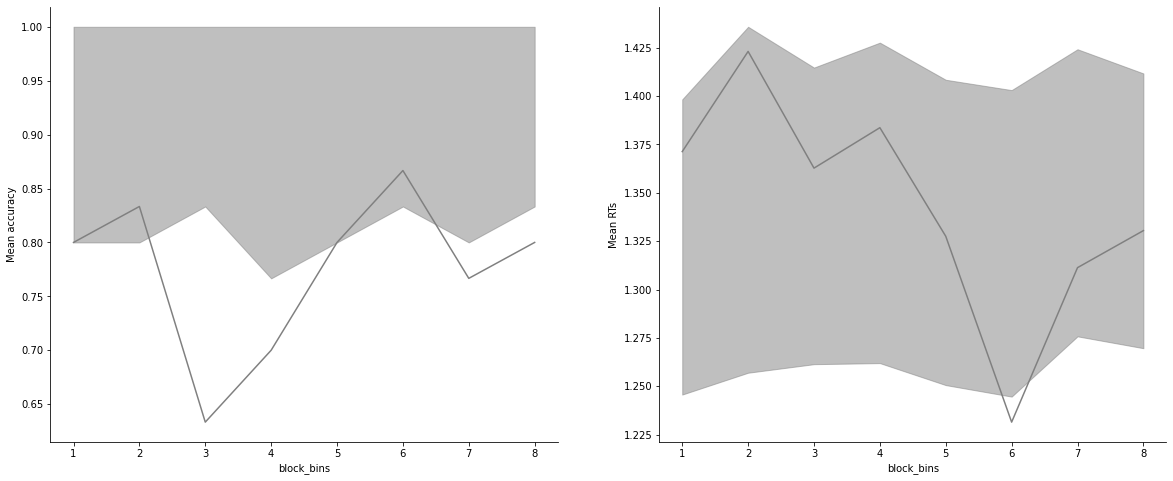

In [23]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

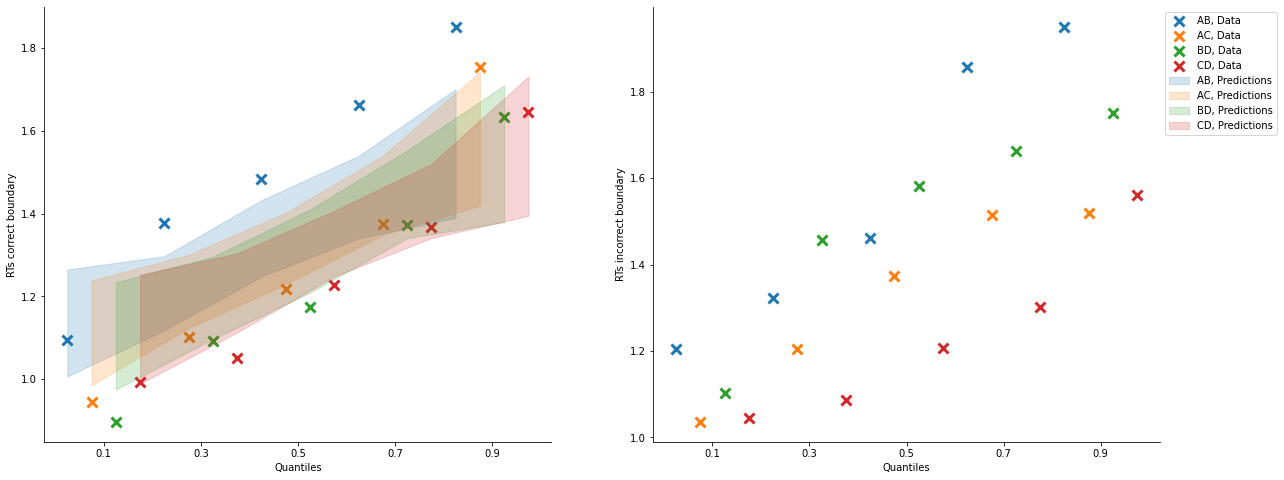

In [24]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);